In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
# Importamos el dataset para entrenar
data = pd.read_excel('Data\E-Commerce_train.xlsx')

In [10]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [11]:
#Revisamos las variables categóricas 
print(data['Warehouse_block'].unique())
print(data['Mode_of_Shipment'].unique())
print(data['Product_importance'].unique())
print(data['Gender'].unique())

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


In [12]:
# Separamos las variables numéricas
numerica = data.drop(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)
numerica.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


In [13]:
categoricas = data.filter(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])
categoricas.head()

,ID,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,1,D,Flight,low,F
1,2,F,Flight,low,M
2,3,A,Flight,low,M
3,4,B,Flight,medium,M
4,5,C,Flight,medium,F


c:\Users\Sebastián\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_care_calls'>

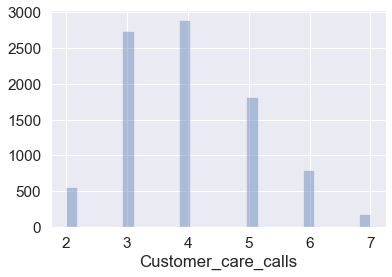

In [32]:
sns.distplot(numerica.Customer_care_calls,kde=False)